In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
from math import pi
from matplotlib_venn import venn2

In [6]:
def ask_more_values(value):
    """
    Ask the user if they would like to add an additional value
    """ 
    resp = 'yes'
    counter = 0
    while len(resp) > 1 and counter < 3:
        if counter == 0:
            resp = input(f'Would you like to add another {value}? (Y/N)\n')
            counter += 1
        elif counter < 3:
            resp = input('Sorry, I didn\'t understand that. Please enter "Y" or "N".\n')
            counter += 1
        else:
            print('I\'m, having a hard time understanding you. Please try again later.')
            resp = 'quit'
            break
    
    return resp

In [7]:
def get_feature_list():
    """
    Ask the user to enter a feature
    """
    # artificial max number of features
    n = 10
    
    # At least one feature is requested
    feature_list = []
    feature_list.append(input('Please enter a feature you will use to make your decsision:\n'))
    
    # Set initial response
    resp = ask_more_values('feature')

    # More features are requested one at a time
    while resp.lower() == 'y' and len(feature_list) < n:
        feature_list.append(input('Please enter a feature you will use to make your decsision:\n'))
        resp = ask_more_values('feature')
    
    return feature_list

In [8]:
# Test function

feature_list = get_feature_list()
feature_list

Please enter a feature you will use to make your decsision:
feature1
Would you like to add another feature? (Y/N)
y
Please enter a feature you will use to make your decsision:
feature2
Would you like to add another feature? (Y/N)
y
Please enter a feature you will use to make your decsision:
feature3
Would you like to add another feature? (Y/N)
n


['feature1', 'feature2', 'feature3']

In [9]:
def set_feature_importance(feature_list):
    """
    Set the importance of each feature
    """
    # Total for feature importances should add up to a round number
    num_features = len(feature_list)
    if num_features==1:
        df.iloc[0,'importance']=1
        return df
    elif num_features<10:
        total_importance = 10
    else:
        total_importance = 100
        
    print(f'Imagine you have {total_importance} points to assign to your {num_features} features.\n')
    print(f'Assign a nonnegative whole number to each of the following features making sure the total sums to {total_importance}.')
    np.random.shuffle(feature_list)
    feature_dict = {}
    points_used = 0
    for index, feature in enumerate(feature_list):
        print(f'You have {total_importance - points_used} points left,')
        print(f'and {num_features - index} more features to value.\n')
        time.sleep(1)
        try:
            feature_dict[feature] = input(f'How much do you value {feature}?\t')
            feature_dict[feature] = {'value': int(feature_dict[feature]), 'percent': int(feature_dict[feature])/total_importance}
            points_used += feature_dict[feature]['value']
        except:
            print('You must enter a whole number')
            feature_dict[feature] = input(f'How much do you value {feature}?\t')
            feature_dict[feature] = {'value': int(feature_dict[feature]), 'percent': int(feature_dict[feature])/total_importance}
            points_used += feature_dict[feature]['value']
            
    return feature_dict

In [11]:
# Test function
feature_dict = set_feature_importance(feature_list)
feature_dict

Imagine you have 10 points to assign to your 3 features.

Assign a nonnegative whole number to each of the following features making sure the total sums to 10.
You have 10 points left,
and 3 more features to value.

How much do you value feature1?	3
You have 7 points left,
and 2 more features to value.

How much do you value feature2?	4
You have 3 points left,
and 1 more features to value.

How much do you value feature3?	3


{'feature1': {'value': 3, 'percent': 0.3},
 'feature2': {'value': 4, 'percent': 0.4},
 'feature3': {'value': 3, 'percent': 0.3}}

In [12]:
def get_option_list():
    """
    Ask the user to enter an option
    """
    # artificial max number of features
    n = 5
    
    # At least one feature is requested
    option_list = []
    option_list.append(input('Please enter the first option you need to compare:\n'))
    
    # Set initial response
    resp = ask_more_values('option')

    # More features are requested one at a time
    while resp.lower() == 'y' and len(option_list) < n:
        option_list.append(input('Please enter the next option you are comparing:\n'))
        resp = ask_more_values('option')
    
    return option_list

In [13]:
# Test function
option_list = get_option_list()
option_list

Please enter the first option you need to compare:
alpha
Would you like to add another option? (Y/N)
y
Please enter the next option you are comparing:
beta
Would you like to add another option? (Y/N)
n


['alpha', 'beta']

In [14]:
def rate_each_option(feature_list, option_list):
    """
    rate each feature in each option
    """
    option_dict = {}
    for option in option_list:
        feature_rating_dict = {}
        for feature in feature_list:
            feature_rating_dict[feature] = int(input(f'How do you rate {option} in terms of {feature}?\n'))
        option_dict[option] = feature_rating_dict
        
    return option_dict

In [15]:
# Test function

option_dict = rate_each_option(feature_list, option_list)
option_dict

How do you rate alpha in terms of feature1?
1
How do you rate alpha in terms of feature2?
2
How do you rate alpha in terms of feature3?
3
How do you rate beta in terms of feature1?
3
How do you rate beta in terms of feature2?
2
How do you rate beta in terms of feature3?
1


{'alpha': {'feature1': 1, 'feature2': 2, 'feature3': 3},
 'beta': {'feature1': 3, 'feature2': 2, 'feature3': 1}}

In [16]:
pd.DataFrame.from_dict(option_dict)

,alpha,beta
feature1,1,3
feature2,2,2
feature3,3,1


In [17]:
pd.DataFrame(feature_dict).T

,percent,value
feature1,0.3,3.0
feature2,0.4,4.0
feature3,0.3,3.0


In [18]:
option_value_df = pd.DataFrame.from_dict(option_dict).merge(pd.DataFrame(feature_dict).T, left_index=True, right_index=True)

In [19]:
def print_scores(option_value_df, option_list):
    for option in option_list:
        total = option_value_df[option]*option_value_df['percent']
        print(f'{option}: ', total.sum()/10)
    return

In [20]:
print_scores(option_value_df, option_list)

alpha:  0.2
beta:  0.2


In [21]:
option_value_df

,alpha,beta,percent,value
feature1,1,3,0.3,3.0
feature2,2,2,0.4,4.0
feature3,3,1,0.3,3.0


In [22]:
def dual_radar_plot(df, comparison_pair):
    """
    Make a radar plot comparing feature values of two options
    """
    # ------- PART 1: Create background
    feature_list = df.index.values

    # number of variable
    N = len(feature_list)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], feature_list)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2, 4, 6, 8], ["2", "4", "6", "8"], color="grey", size=7)
    plt.ylim(0, 10)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
    for option in comparison_pair:
        values = df[option].values.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=option)
        ax.fill(angles, values, 'b', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

In [23]:
def get_options_for_radar(option_list):
    """
    Gets 1 or 2 options for the radar plot
    """
    print('Choose up to two options to compare on a radar plot. ')
    print('Remember, the list of options are:\n')
    print(*option_list, sep="\n")
    comparison_list = ['none']
    counter = 0
    time.sleep(1)
    while comparison_list[0] not in option_list:
        comparison_list[0] = input('Enter the first option to compare:\n')
        counter += 1
        if counter > 3:
            print('Sorry, I missed that. I\'ll use the first option.')
            comparison_list[0] = option_list[0]
            break
    
    comparison_list.append(input('Enter the second option to compare, or type "none":\n'))
    while comparison_list[1] not in option_list:
        comparison_list[1] = input('Enter the first option to compare:\n')
        counter += 1
        if counter > 3:
            print('Sorry, I missed that. We\'ll skip this option.')
            comparison_list[1] = 'none'
            break
    
    if comparison_list[1] == 'none':
        return comparison_list[0]
    return comparison_list

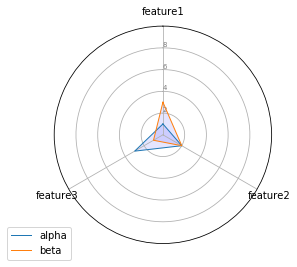

In [25]:
dual_radar_plot(option_value_df, ['alpha', 'beta'])

In [31]:
def create_comparison_sets(df, comparison_pair):
    """
    Create sets of dictionaries for use in Venn Diagram
    """
    
    list_of_dicts = df[comparison_pair].T.to_dict('records')
    list_of_sets = [set(list_of_dicts[0]), set(list_of_dicts[1])]
    venn2(list_of_sets)
    plt.show()
    
    return list_of_dicts

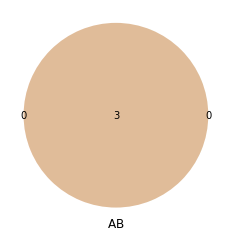

[{'feature1': 1, 'feature2': 2, 'feature3': 3},
 {'feature1': 3, 'feature2': 2, 'feature3': 1}]

In [32]:
create_comparison_sets(option_value_df, ['alpha', 'beta'])